# Package loading and basic configurations

In [1]:
%load_ext autoreload
%autoreload 2

# load dependencies'
import pandas as pd
import geopandas as gpd

from envirocar import TrackAPI, DownloadClient, BboxSelector, ECConfig, TrackConverter

# create an initial but optional config and an api client
config = ECConfig()
track_api = TrackAPI(api_client=DownloadClient(config=config))

# Querying enviroCar Tracks

The following cell queries tracks from the enviroCar API. It defines a bbox for the area of Münster (Germany) and requests 50 tracks. The result is a GeoDataFrame, which is a geo-extended Pandas dataframe from the GeoPandas library. It contains all information of the track in a flat dataframe format including a specific geometry column. 

In [2]:
bbox = BboxSelector([
    7.601165771484375, # min_x
    51.94807412325402, # min_y
    7.648200988769531, # max_x
    51.97261482608728  # max_y
])

# issue a query
track_df = track_api.get_tracks(bbox=bbox, num_results=50) # requesting 50 tracks inside the bbox
track_df

,id,time,geometry,Throttle Position.value,Throttle Position.unit,CO2.value,CO2.unit,GPS VDOP.value,GPS VDOP.unit,GPS Bearing.value,...,sensor.constructionYear,sensor.manufacturer,track.appVersion,track.touVersion,O2 Lambda Voltage ER.value,O2 Lambda Voltage ER.unit,MAF.value,MAF.unit,O2 Lambda Voltage.value,O2 Lambda Voltage.unit
0,5eb7582165b80c5d6be69f24,2020-05-09T21:10:46,POINT (7.65180 51.95396),16.000000,%,6.060965,kg/h,1.000000,precision,244.006986,...,2007,Dodge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5eb7582165b80c5d6be69f26,2020-05-09T21:10:51,POINT (7.65169 51.95395),16.831018,%,7.644530,kg/h,1.000000,precision,273.231882,...,2007,Dodge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5eb7582165b80c5d6be69f27,2020-05-09T21:10:56,POINT (7.65148 51.95395),16.846021,%,6.152178,kg/h,1.000000,precision,273.377388,...,2007,Dodge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5eb7582165b80c5d6be69f28,2020-05-09T21:11:01,POINT (7.65127 51.95397),17.000001,%,7.380207,kg/h,0.930191,precision,274.705621,...,2007,Dodge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5eb7582165b80c5d6be69f29,2020-05-09T21:11:06,POINT (7.65101 51.95396),15.151858,%,3.983817,kg/h,1.000000,precision,275.181028,...,2007,Dodge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,5dc985eb44ea856b702dd986,2019-10-29T16:10:53,POINT (7.59827 51.96493),16.027855,%,8.579484,kg/h,1.016152,precision,269.728716,...,2004,Mercedes Benz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,5dc985eb44ea856b702dd987,2019-10-29T16:10:58,POINT (7.59737 51.96492),14.000000,%,4.308154,kg/h,1.015842,precision,268.303093,...,2004,Mercedes Benz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,5dc985eb44ea856b702dd988,2019-10-29T16:11:03,POINT (7.59646 51.96492),32.000001,%,18.595897,kg/h,1.100000,precision,273.328479,...,2004,Mercedes Benz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,5dc985eb44ea856b702dd989,2019-10-29T16:11:08,POINT (7.59541 51.96499),16.000000,%,7.105633,kg/h,1.267463,precision,276.193063,...,2004,Mercedes Benz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


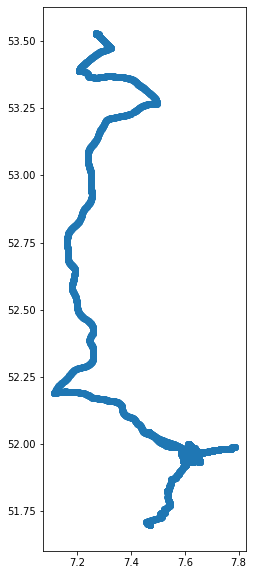

In [3]:
track_df.plot(figsize=(8, 10))

# Inspecting a single Track

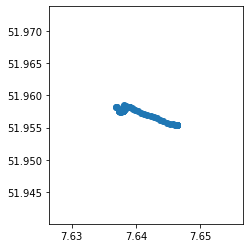

In [4]:
some_track_id = track_df['track.id'].unique()[5]
some_track = track_df[track_df['track.id'] == some_track_id]
some_track.plot()

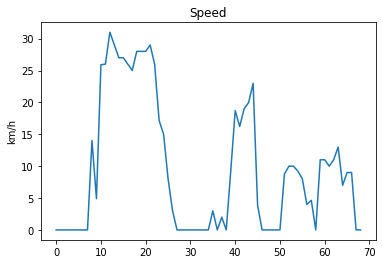

In [5]:
ax = some_track['Speed.value'].plot()
ax.set_title("Speed")
ax.set_ylabel(some_track['Speed.unit'][0])
ax

In [18]:
TrackConverter(some_track).to_scikitmobility()

,uid,tid,lat,lng,datetime,CO2.unit,CO2.value,Calculated MAF.unit,Calculated MAF.value,Consumption.unit,...,sensor.engineDisplacement,sensor.fuelType,sensor.manufacturer,sensor.model,sensor.type,track.appVersion,track.begin,track.end,track.length,track.touVersion
0,58395f40e4b0a979d45bd61b,5e24ca2463c90936dc7b2d94,7.646327,51.955395,2020-01-17 15:58:38,kg/h,4.094951,g/s,5.300929,l/h,...,1798,gasoline,Dodge,Caliber,car,NaN,2020-01-17T15:58:38Z,2020-01-17T16:06:21Z,1.152504,NaN
1,58395f40e4b0a979d45bd61b,5e24ca2463c90936dc7b2d94,7.646326,51.955392,2020-01-17 15:58:43,kg/h,4.055918,g/s,5.250401,l/h,...,1798,gasoline,Dodge,Caliber,car,NaN,2020-01-17T15:58:38Z,2020-01-17T16:06:21Z,1.152504,NaN
2,58395f40e4b0a979d45bd61b,5e24ca2463c90936dc7b2d94,7.646326,51.955393,2020-01-17 15:58:48,kg/h,3.982729,g/s,5.155657,l/h,...,1798,gasoline,Dodge,Caliber,car,NaN,2020-01-17T15:58:38Z,2020-01-17T16:06:21Z,1.152504,NaN
3,58395f40e4b0a979d45bd61b,5e24ca2463c90936dc7b2d94,7.646326,51.955393,2020-01-17 15:58:53,kg/h,4.007283,g/s,5.187442,l/h,...,1798,gasoline,Dodge,Caliber,car,NaN,2020-01-17T15:58:38Z,2020-01-17T16:06:21Z,1.152504,NaN
4,58395f40e4b0a979d45bd61b,5e24ca2463c90936dc7b2d94,7.646326,51.955393,2020-01-17 15:58:58,kg/h,4.019175,g/s,5.202837,l/h,...,1798,gasoline,Dodge,Caliber,car,NaN,2020-01-17T15:58:38Z,2020-01-17T16:06:21Z,1.152504,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,58395f40e4b0a979d45bd61b,5e24ca2463c90936dc7b2d94,7.638311,51.957937,2020-01-17 16:05:51,kg/h,3.781639,g/s,4.895346,l/h,...,1798,gasoline,Dodge,Caliber,car,NaN,2020-01-17T15:58:38Z,2020-01-17T16:06:21Z,1.152504,NaN
66,58395f40e4b0a979d45bd61b,5e24ca2463c90936dc7b2d94,7.638327,51.957991,2020-01-17 16:05:56,kg/h,5.149422,g/s,6.665945,l/h,...,1798,gasoline,Dodge,Caliber,car,NaN,2020-01-17T15:58:38Z,2020-01-17T16:06:21Z,1.152504,NaN
67,58395f40e4b0a979d45bd61b,5e24ca2463c90936dc7b2d94,7.636856,51.958161,2020-01-17 16:06:11,kg/h,4.281626,g/s,5.542580,l/h,...,1798,gasoline,Dodge,Caliber,car,NaN,2020-01-17T15:58:38Z,2020-01-17T16:06:21Z,1.152504,NaN
68,58395f40e4b0a979d45bd61b,5e24ca2463c90936dc7b2d94,7.636908,51.958213,2020-01-17 16:06:16,kg/h,4.063978,g/s,5.260834,l/h,...,1798,gasoline,Dodge,Caliber,car,NaN,2020-01-17T15:58:38Z,2020-01-17T16:06:21Z,1.152504,NaN
